In [1]:
!pip install ultralytics

import ultralytics
from ultralytics import YOLO
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 20.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
from google.colab.patches import cv2_imshow

In [3]:
ultralytics.checks()

# Создаем модель. При первом вызове загружает веса, требуется интернет
model = YOLO("yolov8s.pt")

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


100%|██████████| 21.5M/21.5M [00:00<00:00, 170MB/s]


In [4]:
results = model('/content/drive/MyDrive/Глубокое обучение/Animals/animals/train/cat/flickr_cat_000002.jpg')


image 1/1 /content/drive/MyDrive/Глубокое обучение/Animals/animals/train/cat/flickr_cat_000002.jpg: 640x640 1 cat, 16.5ms
Speed: 15.9ms preprocess, 16.5ms inference, 1273.6ms postprocess per image at shape (1, 3, 640, 640)


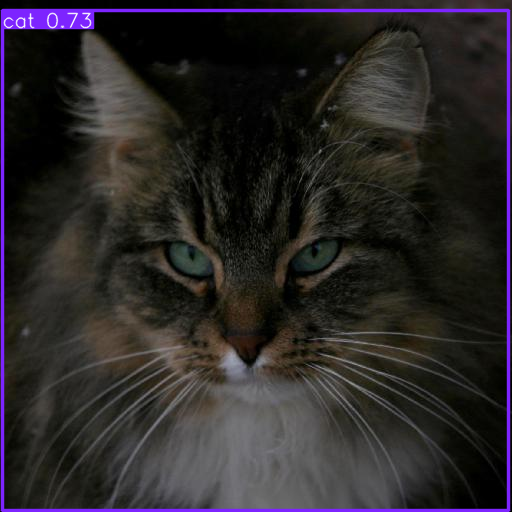

In [6]:
result = results[0]

# Выводим результаты на экран при помощи OpenCV
cv2_imshow(result.plot())

In [7]:
boxes = result.boxes.cpu()       # Рамки объектов по умолчанию в формате YOLO
print(boxes)
boxes = result.boxes.xyxy.cpu()  # Координаты рамок можно преобразовать в пиксели
print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([15.])
conf: tensor([0.7284])
data: tensor([[  2.6631,  10.6216, 508.6068, 510.8380,   0.7284,  15.0000]])
id: None
is_track: False
orig_shape: (512, 512)
shape: torch.Size([1, 6])
xywh: tensor([[255.6350, 260.7298, 505.9436, 500.2163]])
xywhn: tensor([[0.4993, 0.5092, 0.9882, 0.9770]])
xyxy: tensor([[  2.6631,  10.6216, 508.6068, 510.8380]])
xyxyn: tensor([[0.0052, 0.0207, 0.9934, 0.9977]])
tensor([[  2.6631,  10.6216, 508.6068, 510.8380]])


In [8]:
# Вероятности для каждого из обнаруженных объектов
# чем больше, тем сеть увереннее что это именно этот объект
confidences = result.boxes.conf
print(confidences)

classes = result.boxes.cls # Номера классов для каждого объекта
print(classes)
class_names = result.names # Сами названия классов
print(class_names)

# Даже исходное изображение
img = result.orig_img

tensor([0.7284], device='cuda:0')
tensor([15.], device='cuda:0')
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mo

In [27]:
import os

root = '/content/drive/MyDrive/Глубокое обучение/5/'
datadir = '/content/drive/MyDrive/Глубокое обучение/Animals/animals'

if(not os.path.exists(root + 'animals')):
  os.mkdir(root + 'animals')

In [73]:
import pandas as pd
import shutil

for i in os.listdir(datadir):
  if(not os.path.exists(root + 'animals/' + i)):
    os.mkdir(root + 'animals/' + i)
  for j in os.listdir(os.path.join(datadir, i)):
    if(not os.path.exists(os.path.join(root, 'animals', i, j))):
      os.mkdir(os.path.join(root, 'animals', i, j));
    files = os.listdir(os.path.join(datadir, i, j))
    files_short = pd.DataFrame(files).sample(frac=0.6)
    files_short = files_short[0].iloc[:].tolist()
    print(len(files_short))
    for k in files_short:
      shutil.copy(os.path.join(datadir, i, j, k), os.path.join(root, 'animals', i, j, k))

3092
2843
2843
300
300
300


In [75]:
results = model.train(data="/content/drive/MyDrive/Глубокое обучение/5/animals.yaml", model="yolov8s.pt", epochs=1, batch=8,
                      project='animals', val = True, verbose=True)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Глубокое обучение/5/animals.yaml, epochs=1, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=animals, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/drive/MyDrive/Глубокое обучение/5/animals/train/cat... 0 images, 8780 backgrounds, 0 corrupt: 100%|██████████| 8780/8780 [01:27<00:00, 99.86it/s] 

train: WARNING ⚠️ No labels found in /content/drive/MyDrive/Глубокое обучение/5/animals/train/cat.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: /content/drive/MyDrive/Глубокое обучение/5/animals/train/cat.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/Глубокое обучение/5/animals/train/cat.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Глубокое обучение/5/animals/val/cat... 0 images, 902 backgrounds, 0 corrupt: 100%|██████████| 902/902 [00:07<00:00, 116.28it/s]

val: WARNING ⚠️ No labels found in /content/drive/MyDrive/Глубокое обучение/5/animals/val/cat.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


val: New cache created: /content/drive/MyDrive/Глубокое обучение/5/animals/val/cat.cache
WARNING ⚠️ No labels found in /content/drive/MyDrive/Глубокое обучение/5/animals/val/cat.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to animals/train3/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to animals/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.34G          0      20.17          0          0        640: 100%|██████████| 1098/1098 [04:30<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:13<00:00,  4.25it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors


image 1/1 /content/drive/MyDrive/Глубокое обучение/Animals/animals/train/wild/flickr_wild_000005.jpg: 640x640 1 cat, 1 dog, 21.5ms
Speed: 3.8ms preprocess, 21.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


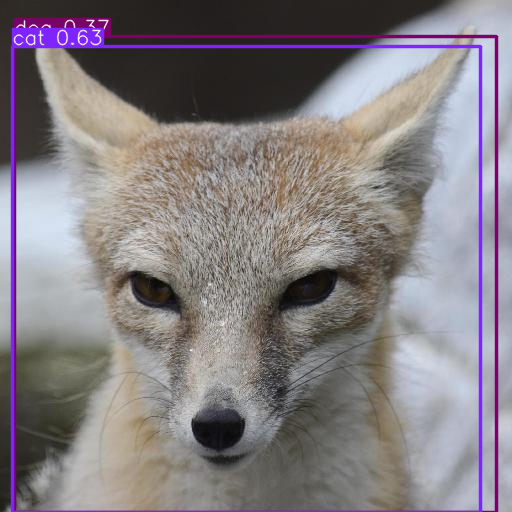

In [87]:
results = model('/content/drive/MyDrive/Глубокое обучение/Animals/animals/train/wild/flickr_wild_000005.jpg')

# посмотрим что получилось
result = results[0]
cv2_imshow(result.plot())